In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

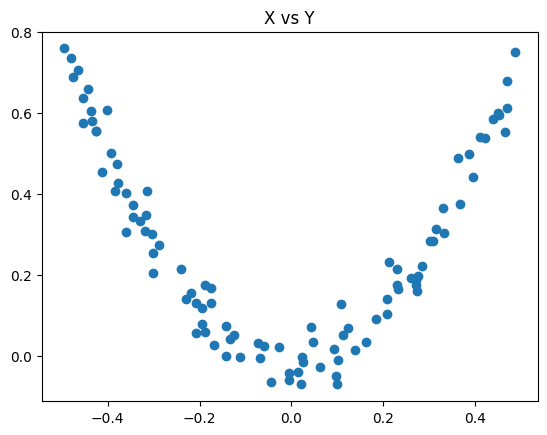

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y

plt.scatter(df['X'], df['y'])
plt.title('X vs Y')
plt.show()

#### 3. Initial Prediction with Mean Value (Model m1)

In [3]:
df['pred1'] = df['y'].mean()

#### 4. Calculating Pseudo-Residuals

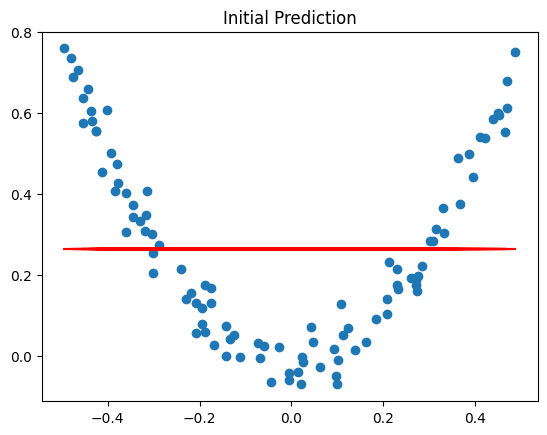

In [4]:
df['res1'] = df['y'] - df['pred1']

plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='red')
plt.title('Initial Prediction')
plt.show()

#### 5. Building the Second Model (m2)

In [5]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['X'].values.reshape(100, 1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

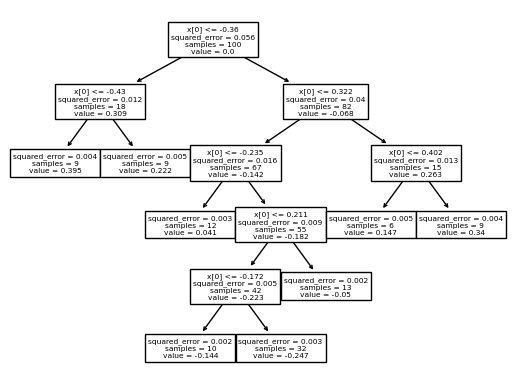

In [6]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

#### 6. Updating Predictions (Model m2)

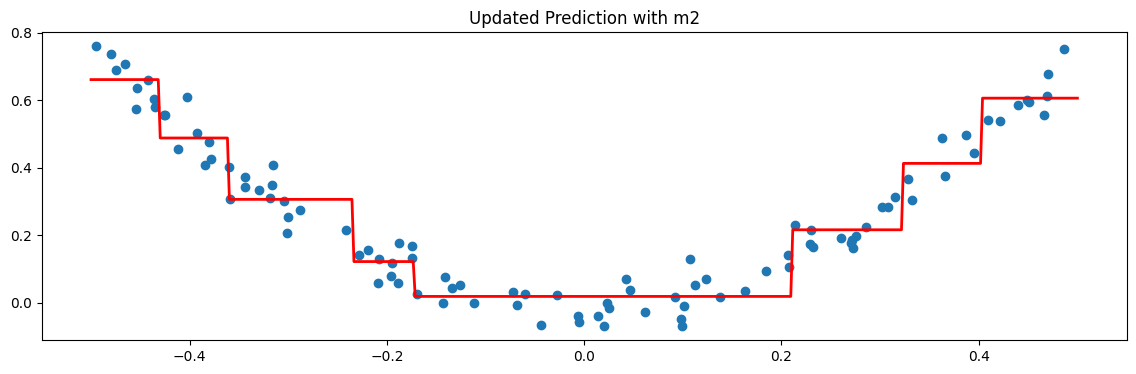

In [7]:
X_test = np.linspace(-0.5, 0.5, 500)
y_pred = df['pred1'].iloc[0] + tree1.predict(X_test.reshape(500, 1))

plt.figure(figsize=(14, 4))
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['y'])
plt.title('Updated Prediction with m2')
plt.show()

#### 7. Adding a Third Model (m3)

In [8]:
df['pred2'] = df['pred1'].iloc[0] + tree1.predict(df['X'].values.reshape(100, 1))
df['res2'] = df['y'] - df['pred2']

tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['X'].values.reshape(100, 1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

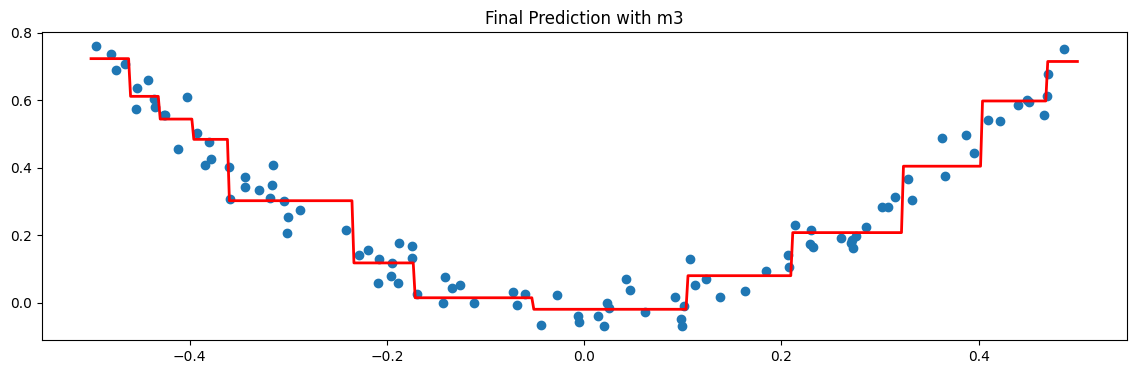

In [9]:
y_pred = df['pred1'].iloc[0] + tree1.predict(X_test.reshape(500, 1)) + tree2.predict(X_test.reshape(500, 1))

plt.figure(figsize=(14, 4))
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['y'])
plt.title('Final Prediction with m3')
plt.show()

## Conclusion
In this , we used three models (m1, m2, m3) to demonstrate how gradient boosting works. Each model successively improves the prediction by focusing on the errors of the previous model. The learning rate is set to 1 for simplicity, but in practice, it's usually set to a lower value like 0.1 to prevent overfitting.